# K Nearest Neighbors Project 

## Import Libraries
**Import pandas,seaborn, dan yang lain.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data
**Baca  'KNN_Project_Data csv ke dataframe**

In [2]:
df_knn = pd.read_csv('/content/KNN_Project_Data')
df_knn_new = pd.DataFrame(df_knn)

**Check the head of the dataframe.**

In [3]:
df_knn.head()

XVPM         GWYH  ...         JHZC  TARGET CLASS
0  1636.670614   817.988525  ...   845.136088             0
1  1013.402760   577.587332  ...   861.081809             1
2  1300.035501   820.518697  ...  1647.186291             1
3  1059.347542  1066.866418  ...  1450.935357             0
4  1018.340526  1313.679056  ...  1899.850792             0

[5 rows x 11 columns]

# EDA


**Gunakan seaborn pada dataframe untuk membuat pairplot dengan hue kolom TARGET CLASS.**

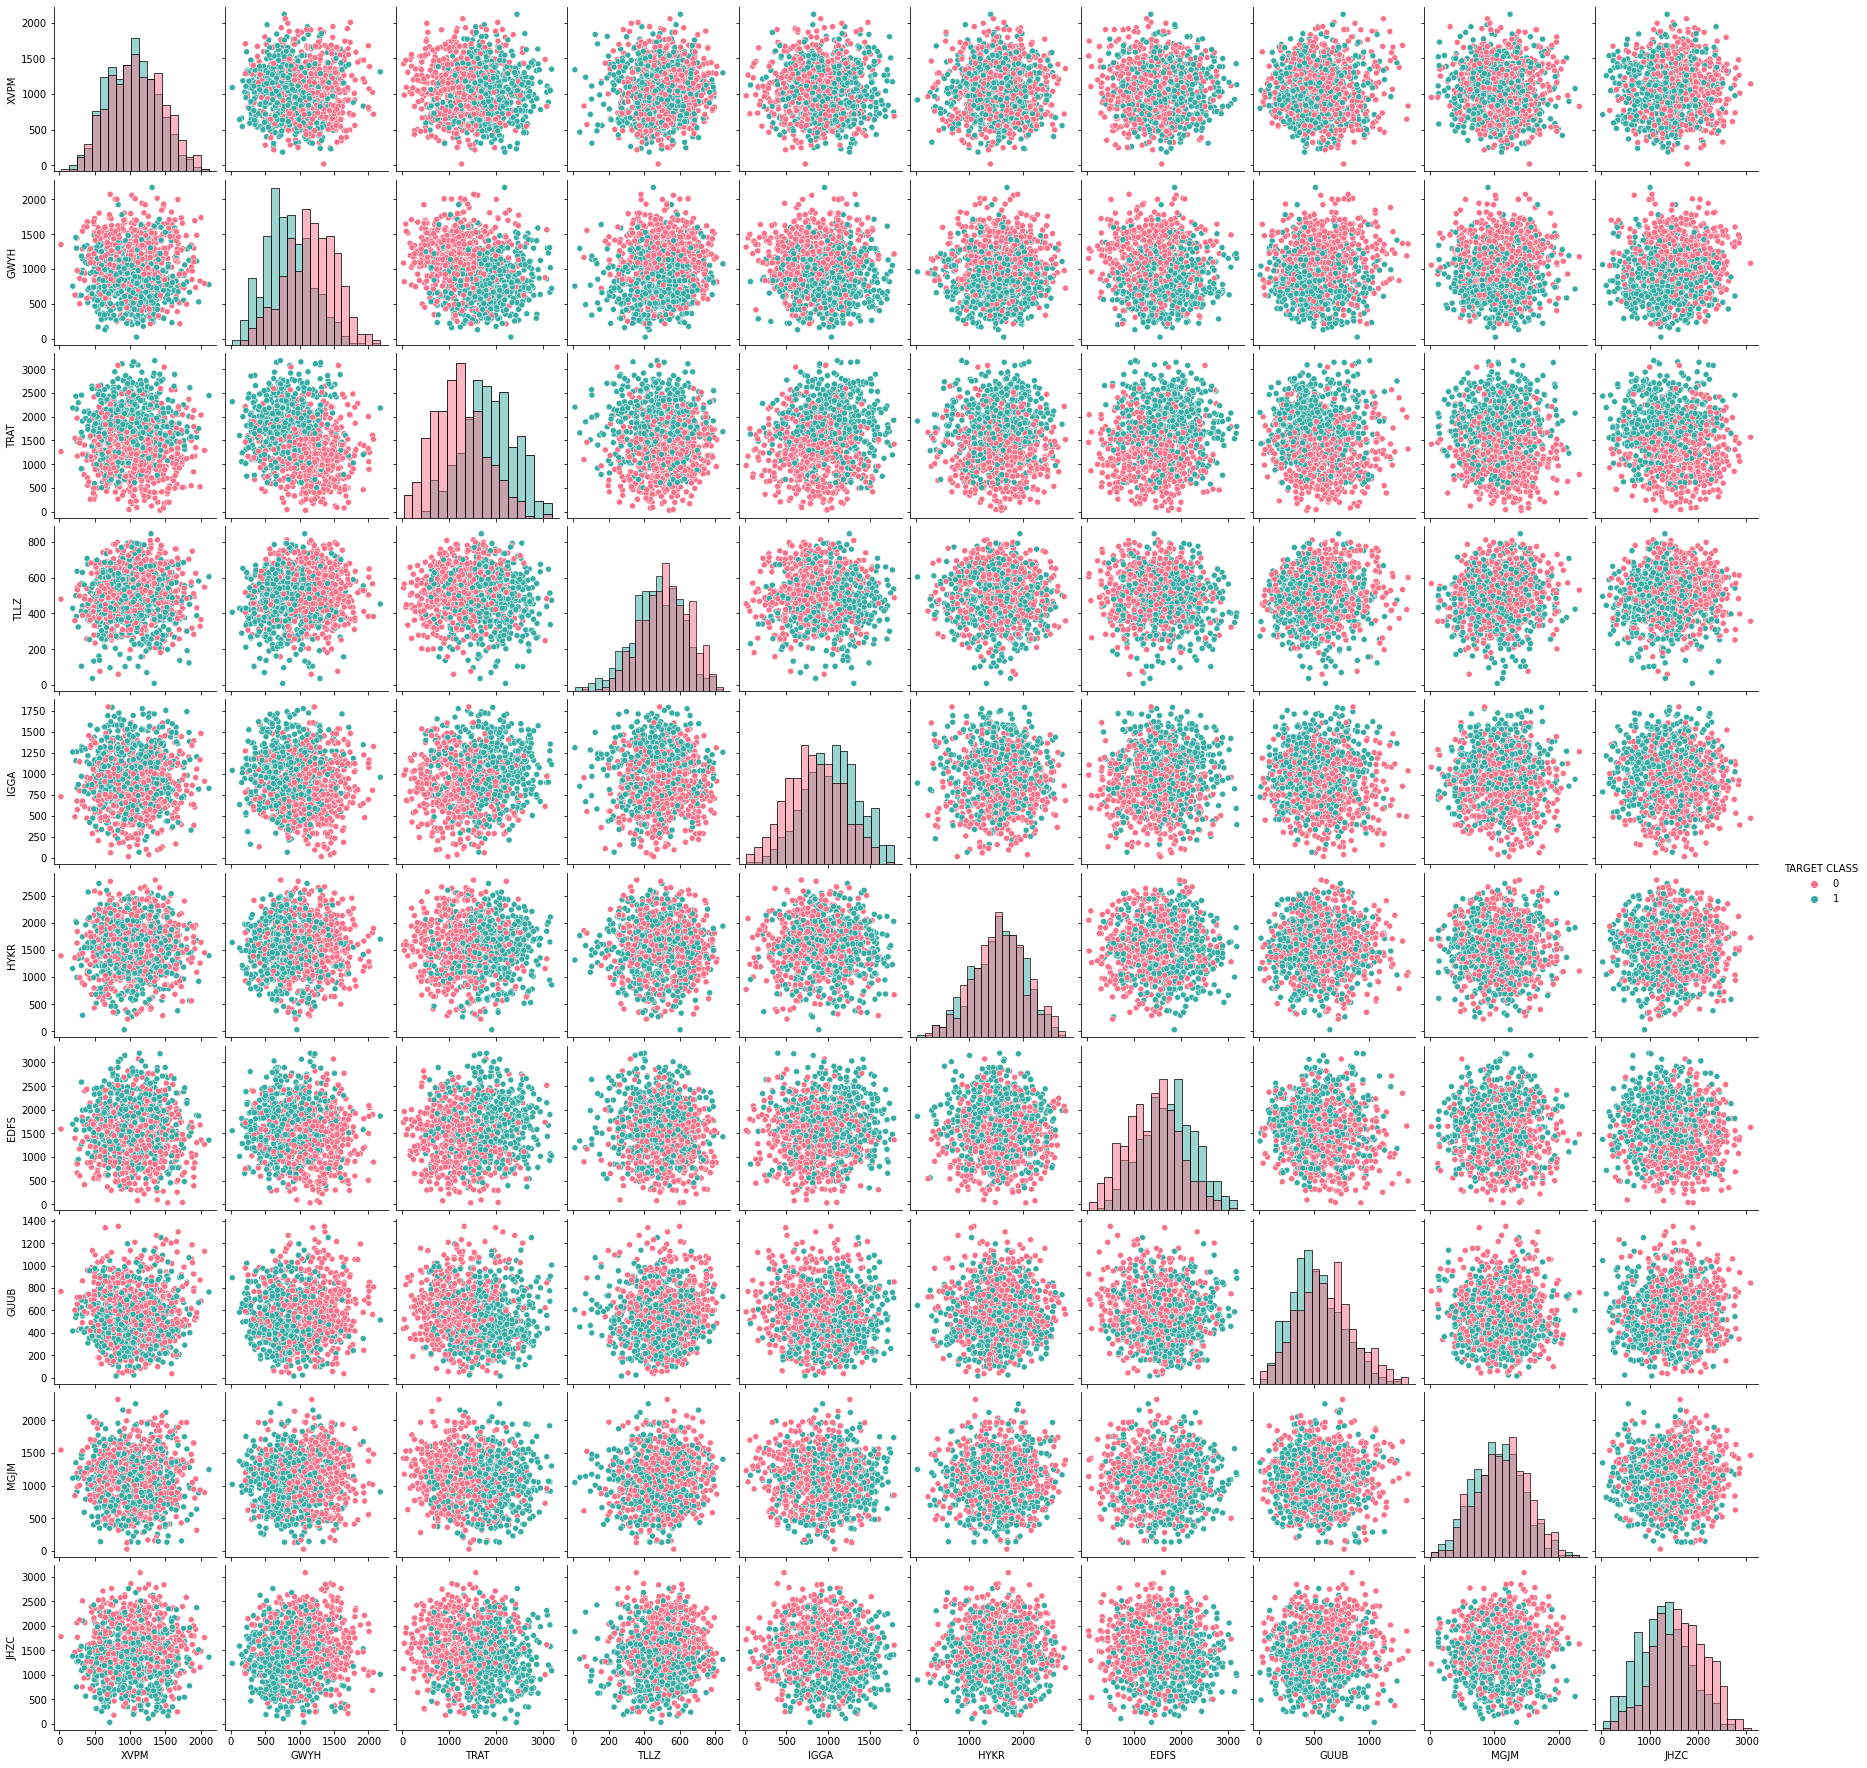

In [4]:
sns.pairplot(df_knn, hue = 'TARGET CLASS', palette='husl', diag_kind='hist')
plt.show()

# Standardize the Variables


**Import StandardScaler dari Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

**buat object StandardScaler() dengan nama scaler.**

In [7]:
scaler = StandardScaler()

**Fit scaler ke features.**

In [8]:
scaler.fit(X = df_knn.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Gunakan .transform() method untuk mengubah feature ke scaled version.**

In [9]:
scaled_fitur = scaler.transform(X = df_knn.drop('TARGET CLASS',axis=1))

**Ubah scaled features menjadi dataframe dan cek head dari dataframe untuk memastikan scaling bekerja.**

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [10]:
df_scaled_fitur = pd.DataFrame(scaled_fitur,columns=df_knn.columns[:-1])
df_scaled_fitur.head()

XVPM      GWYH      TRAT  ...      GUUB      MGJM      JHZC
0  1.568522 -0.443435  1.619808  ... -0.932794  1.008313 -1.069627
1 -0.112376 -1.056574  1.741918  ... -0.461864  0.258321 -1.041546
2  0.660647 -0.436981  0.775793  ...  1.149298  2.184784  0.342811
3  0.011533  0.191324 -1.433473  ... -0.888557  0.162310 -0.002793
4 -0.099059  0.820815 -0.904346  ...  0.391419 -1.365603  0.787762

[5 rows x 10 columns]

In [25]:
df_scaled_fitur.shape

(1000, 10)

# Train Test Split

**Gunakan train_test_split untuk mengubah data menjadi training set dan a testing set.**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_fitur, df_knn['TARGET CLASS'])

In [13]:
X_train.shape

(750, 10)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**Buat KNN model dengan n_neighbors=1**

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit KNN model ke training data.**

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

**Gunakan predict method untukt memprediksi nilai menggunakan KNN model dan X_test.**

In [17]:
prediksi = knn.predict(X_test)

**Buat a confusion matrix and classification report.**

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,prediksi))

[[84 40]
 [33 93]]


In [39]:
print(classification_report(y_test,prediksi))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       147
           1       0.74      0.70      0.72       153

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Gunakan elbow method untuk menentukan K Value!

**Buat perulangan yang mentraining model KNN dengan nilai k yang berbeda kemudian simpan eror rate dengan list**

**Kemudian buat plot menggunakan informasi dari perulangan anda tadi.**

In [21]:
error = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Rating Error')

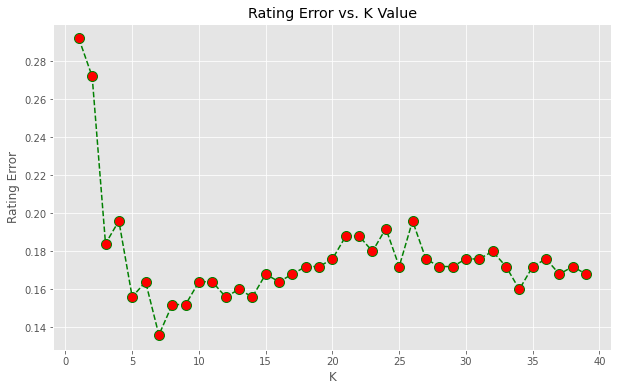

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Rating Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Rating Error')

## Retrain with new K Value

**train kembali model anda dengan K value yang menurut anda terbaik dan lakukan kembali classification report dan  confusion matrix. lihat hasilnya**

In [28]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[100  24]
 [ 20 106]]


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       124
           1       0.82      0.84      0.83       126

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

